In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from sklearn.datasets import make_circles
from keras.layers import Dense,Activation,Input
from keras.models import Model
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
ds=pd.read_csv('/home/himanshusainie97/Downloads/data/fashion-mnist_train.csv')
data=ds.values[1000:9000,1:]/255.0
print data.shape

(8000, 784)


In [3]:
inp = Input(shape=(784,))
h1 = Dense(100)
a1 = Activation('sigmoid')
y = Dense(784)
ya = Activation('sigmoid')

y_out = ya(y(a1(h1(inp))))

model = Model(input=[inp], output=[y_out])

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 784)               79184     
_________________________________________________________________
activation_2 (Activation)    (None, 784)               0         
Total params: 157,684
Trainable params: 157,684
Non-trainable params: 0
_________________________________________________________________


/home/himanshusainie97/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=[<tf.Tenso..., inputs=[<tf.Tenso...)`
  if __name__ == '__main__':


In [4]:
model.compile(loss='MSE', optimizer='adam', metrics=['accuracy'])

In [5]:
split = int(0.8*data.shape[0])
print split
print data.shape

6400
(8000, 784)


In [6]:
model.fit(data[:split], data[:split], batch_size=15, nb_epoch=100, verbose=2, validation_data=(data[split:], data[split:]))

/home/himanshusainie97/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 6400 samples, validate on 1600 samples
Epoch 1/100
 - 2s - loss: 0.0586 - acc: 0.0063 - val_loss: 0.0402 - val_acc: 0.0100
Epoch 2/100
 - 2s - loss: 0.0327 - acc: 0.0095 - val_loss: 0.0294 - val_acc: 0.0131
Epoch 3/100
 - 2s - loss: 0.0260 - acc: 0.0130 - val_loss: 0.0247 - val_acc: 0.0138
Epoch 4/100
 - 2s - loss: 0.0224 - acc: 0.0159 - val_loss: 0.0218 - val_acc: 0.0156
Epoch 5/100
 - 2s - loss: 0.0201 - acc: 0.0169 - val_loss: 0.0199 - val_acc: 0.0181
Epoch 6/100
 - 2s - loss: 0.0183 - acc: 0.0156 - val_loss: 0.0183 - val_acc: 0.0219
Epoch 7/100
 - 2s - loss: 0.0169 - acc: 0.0172 - val_loss: 0.0171 - val_acc: 0.0163
Epoch 8/100
 - 2s - loss: 0.0158 - acc: 0.0172 - val_loss: 0.0161 - val_acc: 0.0206
Epoch 9/100
 - 2s - loss: 0.0149 - acc: 0.0216 - val_loss: 0.0153 - val_acc: 0.0188
Epoch 10/100
 - 2s - loss: 0.0141 - acc: 0.0213 - val_loss: 0.0146 - val_acc: 0.0231
Epoch 11/100
 - 2s - loss: 0.0134 - acc: 0.0230 - val_loss: 0.0144 - val_acc: 0.0225
Epoch 12/100
 - 2s - loss:

Epoch 97/100
 - 2s - loss: 0.0064 - acc: 0.0556 - val_loss: 0.0081 - val_acc: 0.0525
Epoch 98/100
 - 2s - loss: 0.0064 - acc: 0.0555 - val_loss: 0.0081 - val_acc: 0.0613
Epoch 99/100
 - 2s - loss: 0.0063 - acc: 0.0548 - val_loss: 0.0083 - val_acc: 0.0525
Epoch 100/100
 - 2s - loss: 0.0064 - acc: 0.0567 - val_loss: 0.0083 - val_acc: 0.0600


In [7]:
a2 = Activation('sigmoid')
enc_out = a2(h1(inp))
encoder = Model(input=[inp], output=[enc_out])

## Decoder
dec_inp = Input(shape=(100,))
dec_out = ya(y(a1(dec_inp)))
decoder = Model(input=[dec_inp], output=[dec_out])

/home/himanshusainie97/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=[<tf.Tenso..., inputs=[<tf.Tenso...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/home/himanshusainie97/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=[<tf.Tenso..., inputs=[<tf.Tenso...)`
  


In [8]:
data_pred = data[:1000]
print data_pred.shape
ex = encoder.predict(data_pred)
print ex.shape

dx = decoder.predict(ex)
print dx.shape

(1000, 784)
(1000, 100)
(1000, 784)


508


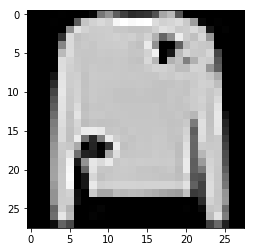

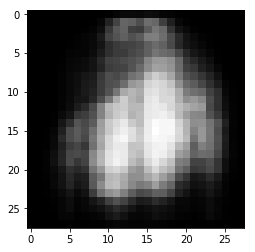

In [9]:
n = np.random.choice(1000)
print n
plt.imshow(data[n].reshape((28, 28)), cmap='gray')
plt.show()
plt.imshow(dx[n].reshape((28, 28)), cmap='gray')
plt.show()